<a href="https://colab.research.google.com/github/vanlicht/MachineLearningJourney/blob/master/tensorflow_practice_specialization/course_02_cnn/week02/Exercise_6_Question_Thomas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
!wget --no-check-certificate \
  "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
  -O "/tmp/cats-and-dogs.zip"

--2020-08-18 04:05:57--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.35.76.84, 2600:1407:d800:29f::e59, 2600:1407:d800:29d::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.35.76.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M  26.8MB/s    in 41s     

2020-08-18 04:06:38 (19.3 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [3]:
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, mode='r')
zip_ref.extractall(path='/tmp')
zip_ref.close()

In [4]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

12501
12501


In [5]:
# Use os.mkdir to create your  directories
# You will need a directory for cats-v-dogs,and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'

try:
  os.mkdir('/tmp/cats-v-dogs')
  os.mkdir('/tmp/cats-v-dogs/training')
  os.mkdir('/tmp/cats-v-dogs/training/cats')
  os.mkdir('/tmp/cats-v-dogs/training/dogs')
  os.mkdir('/tmp/cats-v-dogs/testing')
  os.mkdir('/tmp/cats-v-dogs/testing/cats')
  os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
  pass

In [6]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  source_list = os.listdir(path=SOURCE)
  clean_source_list=[]
  
  for item in source_list:
    item_size = os.path.getsize(os.path.join(SOURCE, item))
    if(item_size>0):
      clean_source_list.append(item)
    else:
      print('{} is zero length, so ignoring'.format(item))
  #clean up and not include 0 lenth item
  clean_source_list=list(filter(None, clean_source_list))

  #random sampling with split_size, go to Training
  #copy from src files to dst files (training)
  training_amount = int(len(clean_source_list) * SPLIT_SIZE)
  clean_train_source_list = random.sample(clean_source_list, training_amount)
  #copy to training dir
  for pic in clean_train_source_list:
    copyfile(os.path.join(SOURCE, pic), os.path.join(TRAINING, pic))

  #copy the remainder (testing)
  clean_test_source_list = list(set(clean_source_list) - set(clean_train_source_list))
  #copy to testing dir
  for pic in clean_test_source_list:
    copyfile(os.path.join(SOURCE, pic), os.path.join(TESTING, pic))


#Source
CAT_SOURCE_DIR = '/tmp/PetImages/Cat/'
DOG_SOURCE_DIR = '/tmp/PetImages/Dog/'
#training set
TRAINING_CATS_DIR = '/tmp/cats-v-dogs/training/cats'
TRAINING_DOGS_DIR = '/tmp/cats-v-dogs/training/dogs'
#testing set
TESTING_CATS_DIR = '/tmp/cats-v-dogs/testing/cats'
TESTING_DOGS_DIR = '/tmp/cats-v-dogs/testing/dogs'

split_size = 0.9

split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


In [7]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [18]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])


In [19]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
TRAINING_DIR='/tmp/cats-v-dogs/training'
train_datagen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,fill_mode='nearest',
    horizontal_flip=True,
    rescale=1.0/255)
train_generator=train_datagen.flow_from_directory(
    TRAINING_DIR, 
    target_size=(150,150), 
    class_mode='binary', 
    batch_size=25)

VALIDATION_DIR='/tmp/cats-v-dogs/testing'
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR, 
    target_size=(150, 150), 
    class_mode='binary', 
    batch_size=25)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [15]:
history = model.fit(
    x=train_generator,
    epochs=5,
    verbose=1, 
    validation_data=validation_generator, 
    steps_per_epoch=900, 
    validation_steps=100)

Epoch 1/5
383/450 [========================>.....] - ETA: 29s - loss: 0.5925 - accuracy: 0.6852

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

450/450 [==============================] - 205s 456ms/step - loss: 0.5907 - accuracy: 0.6874 - val_loss: 0.5461 - val_accuracy: 0.7164
Epoch 2/5
450/450 [==============================] - 203s 452ms/step - loss: 0.5587 - accuracy: 0.7150 - val_loss: 0.5060 - val_accuracy: 0.7544
Epoch 3/5
450/450 [==============================] - 202s 448ms/step - loss: 0.5264 - accuracy: 0.7382 - val_loss: 0.5316 - val_accuracy: 0.7560
Epoch 4/5
450/450 [==============================] - 200s 445ms/step - loss: 0.5153 - accuracy: 0.7497 - val_loss: 0.4384 - val_accuracy: 0.8024
Epoch 5/5
450/450 [==============================] - 200s 445ms/step - loss: 0.5009 - accuracy: 0.7609 - val_loss: 0.4415 - val_accuracy: 0.7948


Text(0.5, 1.0, 'Training and validation loss')

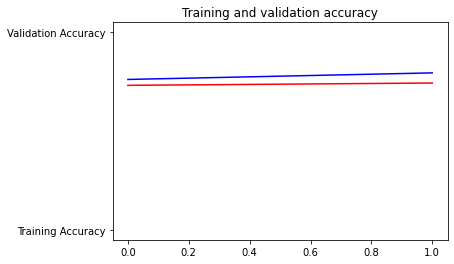

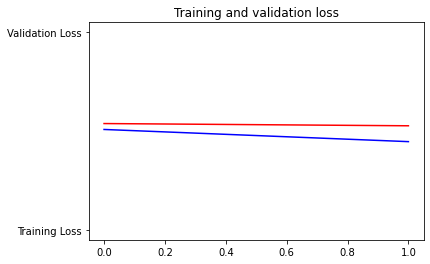

In [24]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)